Bibliotecas importadas

In [0]:
#Importando todas as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

Tratamento de dados

In [125]:
#Importando a base de dados
from google.colab import files

uploaded = files.upload()


Saving comp_bikes_mod.csv to comp_bikes_mod (2).csv


In [0]:
#Fazendo a leitura da base de dados
dataset = pd.read_csv('/content/comp_bikes_mod.csv')

In [127]:
#Primeiras informações da base de dados
print(dataset.shape)
dataset.info()
dataset.head()

(17379, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [128]:
#Verificando dados nulos
dataset.isnull().sum()

instant       1738
dteday        1738
season        1738
yr            1738
mnth          1738
hr            1738
holiday       1738
weekday       1738
workingday    1738
weathersit    1738
temp          1738
atemp         1738
hum           1738
windspeed     1738
casual        1738
registered    1738
cnt           1738
dtype: int64

In [129]:
#Retirando as linhas que contém 'dteday' com valores nulos
dataset = dataset.dropna(subset=['dteday'])
print(dataset.shape)
dataset.info()
dataset.head()

(15641, 17)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     14060 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      14061 non-null  float64
 3   yr          14076 non-null  float64
 4   mnth        14062 non-null  float64
 5   hr          14068 non-null  float64
 6   holiday     14076 non-null  float64
 7   weekday     14078 non-null  float64
 8   workingday  14097 non-null  float64
 9   weathersit  14078 non-null  float64
 10  temp        14066 non-null  float64
 11  atemp       14076 non-null  float64
 12  hum         14070 non-null  float64
 13  windspeed   14082 non-null  float64
 14  casual      14071 non-null  float64
 15  registered  14090 non-null  float64
 16  cnt         14079 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.1+ MB


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
5,6.0,2011-01-01,1.0,0.0,1.0,5.0,0.0,6.0,0.0,2.0,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0


Pergunta 1

In [130]:
#Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". 
#Transforme a coluna "dteday" no tipo "datetime". 
#Qual é a última data presente no dataset ( YYYY-MM-DD)?

dataset['dteday'] = pd.to_datetime(dataset['dteday']) #transformando a coluna em datetime
dataset.tail() #mostrando os últimos resultados

#2012-12-31

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17373,17374.0,2012-12-31,1.0,1.0,12.0,18.0,0.0,1.0,1.0,2.0,0.26,NaN,0.48,0.1343,10.0,112.0,122.0
17374,17375.0,2012-12-31,NaN,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
17375,17376.0,2012-12-31,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,NaN,NaN,89.0
17377,NaN,2012-12-31,1.0,1.0,NaN,NaN,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0
17378,NaN,2012-12-31,NaN,1.0,NaN,23.0,0.0,1.0,1.0,1.0,NaN,0.2727,0.65,0.1343,12.0,37.0,49.0


Pergunta 2

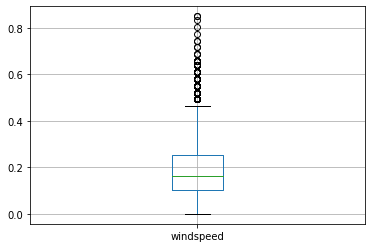

In [131]:
#Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". 
#Considerendo o boxplot da variável "windspeed" (velocidade do vento) é CORRETO afirmar?

dataset.boxplot(['windspeed'])

#Existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot.

Pergunta 3

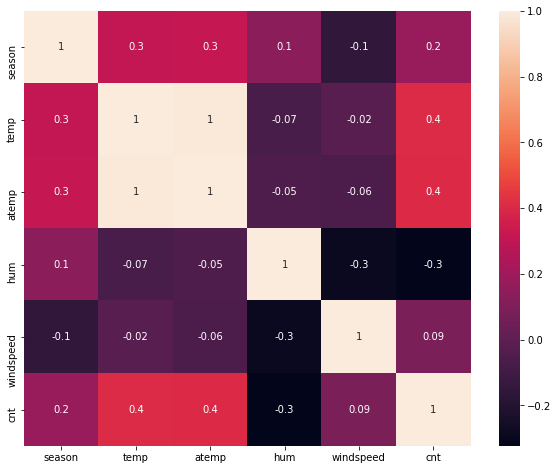

In [132]:
#Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". 
#Selecione as colunas "season", "temp", "atemp", "hum", "windspeed". 
#Plot a matriz de correlação. 
#Sobre as variáveis "hum" e "cnt" é CORRETO afirmar:

plt.figure(figsize=(10, 8)) #configurando tamanho da imagem
corr = dataset[['season', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr() #configurando dados a serem correlacionados
sns.heatmap(corr, annot=True, fmt='.1g') #propriedades do heatmap
plt.show();

#Possuem baixa correlação linear negativa.

Pergunta 4

In [133]:
#Quantos tipos diferentes de dados existem no dataset do desafio?

dataset.info()

#2 - datetime64[ns] e float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     14060 non-null  float64       
 1   dteday      15641 non-null  datetime64[ns]
 2   season      14061 non-null  float64       
 3   yr          14076 non-null  float64       
 4   mnth        14062 non-null  float64       
 5   hr          14068 non-null  float64       
 6   holiday     14076 non-null  float64       
 7   weekday     14078 non-null  float64       
 8   workingday  14097 non-null  float64       
 9   weathersit  14078 non-null  float64       
 10  temp        14066 non-null  float64       
 11  atemp       14076 non-null  float64       
 12  hum         14070 non-null  float64       
 13  windspeed   14082 non-null  float64       
 14  casual      14071 non-null  float64       
 15  registered  14090 non-null  float64       
 16  cnt         14079 non-

Pergunta 5

In [0]:
#Com base na árvore de decisão é CORRETO afirmar:

#Pode ser utilizada para classificação e regressão.

Pergunta 6

In [135]:
#Qual é a proporção (em %) de valores nulos existente na coluna "temp" (temperatura ambiente normalizada)?

dataset.info()
print(((15461-14066)/15461)*100) 

#10%

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     14060 non-null  float64       
 1   dteday      15641 non-null  datetime64[ns]
 2   season      14061 non-null  float64       
 3   yr          14076 non-null  float64       
 4   mnth        14062 non-null  float64       
 5   hr          14068 non-null  float64       
 6   holiday     14076 non-null  float64       
 7   weekday     14078 non-null  float64       
 8   workingday  14097 non-null  float64       
 9   weathersit  14078 non-null  float64       
 10  temp        14066 non-null  float64       
 11  atemp       14076 non-null  float64       
 12  hum         14070 non-null  float64       
 13  windspeed   14082 non-null  float64       
 14  casual      14071 non-null  float64       
 15  registered  14090 non-null  float64       
 16  cnt         14079 non-

Pergunta 7

In [136]:
#Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". 
#Transforme a coluna "season" em valores categóricos. 
#Quantas categorias diferentes existem?

#4

dataset['season'] = dataset['season'].astype('category') #transformando a coluna em categórica
dataset['season'].dtypes #verificando as categorias

CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0], ordered=False)

Pergunta 8

datasetArvore = dataset[['hum','casual','cnt']] #criando dataset para aplicar regressão

x = datasetArvore[['hum','casual']] #definindo variáveis independentes
y = datasetArvore['cnt'] #definindo variáveis dependentes

modeloArvore = DecisionTreeRegressor() #criando o modelo

modeloArvore.fit(x, y) # Fit do modelo

y_pred = modeloArvore.predict(x) #verificar previsões

accuracy = r2_score(y, y_pred) #Verificando resultados
print("Valor de R2: %0.2f" % accuracy)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-82-8eb2f8dbf168> in <module>()
     10 modeloArvore = DecisionTreeRegressor() #criando o modelo
     11 
---> 12 modeloArvore.fit(x, y) # Fit do modelo
     13 
     14 y_pred = modeloArvore.predict(x) #verificar previsões


     
ValueError: Input contains NaN, infinity or a value too large for dtype('float32')

**Necessário retirar valores nulos!**

In [137]:
#Utilize os mesmos dados da questão anterior ("hum" e "casual" como variáveis independentes e "cnt" como variavel dependente). 
#Aplique a árvore de decisão como regressão. 
#Qual é o valor aproximado de R2? Utilize as entradas como teste e valores "default".

datasetArvore = dataset[['hum','casual','cnt']] #criando dataset para aplicar regressão

datasetArvore.fillna(datasetArvore.mean(), inplace=True) #preenchendo o dataset novo com a média dos valores

x = datasetArvore[['hum','casual']] #definindo variáveis independentes
y = datasetArvore['cnt'] #definindo variáveis dependentes

modeloArvore = DecisionTreeRegressor() #criando o modelo

modeloArvore.fit(x, y) # Fit do modelo

y_pred = modeloArvore.predict(x) #verificar previsões

accuracy = r2_score(y, y_pred) #Verificando resultados
print("Valor de R2: %0.2f" % accuracy)

#Resposta 0,70

Valor de R2: 0.71


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Pergunta 9

In [138]:
#Preencha os valores nulos das colunas "hum","cnt" e "casual" com os valores médios. 
#Utilize as variáveis "hum" e "casual" como independentes e a "cnt" como dependente. 
#Aplique uma regressão linear. 
#Qual o valor de R2? Utilize as entradas como teste.

datasetRegressao = dataset[['hum','casual','cnt']] #criando dataset para aplicar regressão

datasetRegressao.fillna(datasetRegressao.mean(), inplace=True) #preenchendo o dataset novo com a média dos valores

x = datasetRegressao[['hum','casual']] #definindo variáveis independentes
y = datasetRegressao['cnt'] #definindo variáveis dependentes

modeloRegressao = LinearRegression() #criando o modelo

modeloRegressao.fit(x, y) # Fit do modelo

y_pred = modeloRegressao.predict(x) #verificar previsões

accuracy = r2_score(y, y_pred) #Verificando resultados
print("Valor de R2: %0.2f" % accuracy)

#Resposta 0,40

Valor de R2: 0.41


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Pergunta 10

In [139]:
#No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?

datasetOriginal = pd.read_csv('/content/comp_bikes_mod.csv')

print(datasetOriginal.shape)

#17379, 17


(17379, 17)


Pergunta 11

In [140]:
#Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". 
#Qual é o desvio padrão para os dados da coluna "windspeed" (velocidade do vento normalizada)?

dataset['windspeed'].describe()

#0,122

count    14082.000000
mean         0.189552
std          0.122309
min          0.000000
25%          0.104500
50%          0.164200
75%          0.253700
max          0.850700
Name: windspeed, dtype: float64

Pergunta 12

In [141]:
#Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". 
#Qual é o valor médio para os dados da coluna "temp" (temperatura ambiente normalizada)?

dataset['temp'].describe()

#0,496

count    14066.000000
mean         0.496926
std          0.192971
min          0.020000
25%          0.340000
50%          0.500000
75%          0.660000
max          1.000000
Name: temp, dtype: float64

Pergunta 13

In [142]:
#Após retirar as linhas que contém valores nulos para a coluna "dteday", 
#passamos a contar com quantas instancias e atributos, respectivamente?

print(dataset.shape)

#15641, 17

(15641, 17)


Pergunta 14

In [0]:
#Comparando os valores de R2 encontrado com a regressão linear e com a árvore de decisão, é CORRETO afirmar:
#Árvore = 0,7
#Regressão = 0,4

#O valor obtido pela árvore de decisão como regressor apresenta maior R2

Pergunta 15

In [0]:
#Comparando o SVM com a árvore de decisão é CORRETO afirmar:

#SVM encontra o hiperplano que gera a maior separação entre os dados.